# Building a Linear Regression from scratch

The goal of this notebook is to build a linear regression model from scratch. We will use the diamonds dataset to do this task. The diamonds dataset contains the prices and other attributes of almost 54,000 diamonds. This dataset is available in the ggplot2 package in R, but we will use the version of the dataset available in the pydataset package in Python.

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# load data
diamonds = sns.load_dataset('diamonds')

# head
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
# make a sample
diamonds_sample = diamonds.sample(300)

# Extracting feature and target
X = diamonds_sample['carat'].values
y = diamonds_sample['price'].values.reshape(-1,1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

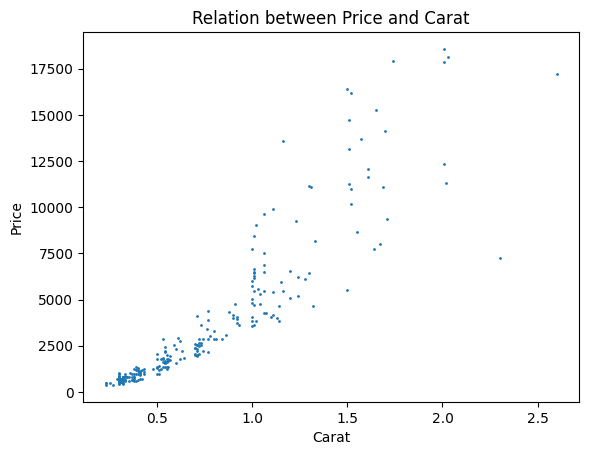

In [37]:
# plot the relation between X and y
plt.scatter(X_train, y_train, s=1)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Relation between Price and Carat')
plt.show()

## Learning about Gradient Descent

Gradient Descent is an optimization algorithm used to minimize a function iteratively. In the case of linear regression on the Boston Housing dataset, the function we're trying to minimize is the Mean Squared Error (MSE), which measures the average squared difference between the actual and predicted values.

### Key points: 

* Objective: The main goal of gradient descent in linear regression is to find the best parameters (coefficients and intercept) that provide the line of best fit for our data, thereby minimizing the MSE.

1. Hypothesis Function: In linear regression, our prediction is made using a linear equation, which is often represented as:
  $$\hat{y} = \beta_0 + \beta_1 x$$
  * Where:
    * $\hat{y}$ is the predicted value.
    * $x$ represents the feature.
    * $\beta_0$ is the y-intercept.
    * $\beta_1$ is the slope or coefficient of the feature.

In [38]:
# Hypothesis function
def hypothesis(X, beta0, beta1):
    return beta0 + beta1 * X

#### Cost Function (MSE):
This function measures how far off our predictions are from the actual values. Mathematically, it's given by:
  $$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
  * Where:
    * $N$ is the number of observations.
    * $y_i$ is the actual value for the i-th observation.
    * $\hat{y}_i$ is the predicted value for the i-th observation.


In [39]:
# Cost function
def compute_cost(X, y, beta0, beta1):
    m = len(y) # number of examples
    predictions = hypothesis(X, beta0, beta1) # predictions of hypothesis on all m examples 
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2) # MSE (Mean Squared Error) 

#### **Gradient Descent Iterations**: 
In each iteration of gradient descent:
   - We compute the gradient of the cost function concerning each parameter. This gradient indicates the direction and rate of change of the cost function.
   - We then adjust the parameters (in this case, $\beta_0$ and $\beta_1$ in the direction of the negative gradient by a step determined by the learning rate. This step helps reduce the cost function.
   - This process is repeated for a specified number of iterations or until the cost function converges to a minimum value.


In [40]:
# Gradient Descent function
def gradient_descent(
        X, # feature
        y, # target
        beta0, # initial values
        beta1, # initial values
        alpha, # learning rate
        iterations # number of iterations
        ):
    m = len(y) # number of samples
    cost_history = [0] * iterations # cost history
    
    for iteration in range(iterations): # loop over the number of iterations
        h = hypothesis(X, beta0, beta1) # get the hypothesis
        
        beta1_gradient = -(1/m) * np.sum(X * (y - h)) # compute the gradient
        beta0_gradient = -(1/m) * np.sum(y - h) # compute the gradient
        
        beta1 = beta1 - alpha * beta1_gradient # update beta1
        beta0 = beta0 - alpha * beta0_gradient # update beta0
        
        cost_history[iteration] = compute_cost(
            X, # feature
            y, # target
            beta0, # beta0
            beta1 # beta1
            )
    
    return beta0, beta1, cost_history

Gradient Descent is a fundamental optimization algorithm, and it's crucial for understanding many machine learning models, not just linear regression. Let's dive deeper:

#### Gradient Descent Overview

**Gradient Descent** is an iterative optimization algorithm used to minimize some function by iteratively moving in the direction of steepest decrease of that function. In the context of machine learning, this function we're trying to minimize is typically a loss or cost function.

##### Intuition:
Imagine you're on a mountain, and it's completely dark. Your objective is to find the lowest point (valley) by only feeling the slope of the ground below your feet. A good strategy might be to take steps proportional to the negative of the slope of the ground (i.e., the steepest descent). Eventually, you'd expect to reach the bottom, assuming the mountain isn't too tricky in shape. This is the core idea of gradient descent.

## Mathematical Description:

### Gradient:
The gradient of a function gives the direction of the steepest ascent. It's a vector that points in the direction where the function increases the most. The gradient is defined as the vector of all its partial derivatives. For a function $f(x_1, x_2, \dots, x_n)$, the gradient is:

$$ \nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right) $$

### Update Rule:
To find the minimum of the function, you'd move in the direction of the negative gradient. This leads to the update rule:

$$ x_{\text{new}} = x_{\text{old}} - \alpha \nabla f(x_{\text{old}}) $$

Where:

- $ x_{\text{new}} $ is the updated parameter.
- $ x_{\text{old}} $ is the current parameter.
- $ \alpha $ is the learning rate. It determines the step size during each iteration.


#### **Learning Rate**: 
It's a hyperparameter that determines the size of the steps we take in each iteration. A good learning rate will allow gradient descent to converge to the minimum of the cost function efficiently. If it's too high, we might overshoot the minimum, and if it's too low, the convergence might be very slow.

In [41]:
# Hyperparameters for gradient descent
alpha_diamonds = 0.000001
iterations_diamonds = 5000

# Initial values for beta0 and beta1
beta0_diamonds = 0
beta1_diamonds = 0

# Run gradient descent
beta0_diamonds_final, beta1_diamonds_final, cost_history_diamonds = gradient_descent(
    X_train, y_train, beta0_diamonds, beta1_diamonds, alpha_diamonds, iterations_diamonds)

The learning rate determines the size of the steps that the algorithm takes towards the minimum of the cost function. In other words, it controls how quickly or slowly we move towards the optimal weights (parameters) in each iteration.

#### Purpose:
The main purpose of the learning rate is to ensure efficient and effective convergence to the global minimum of the cost function. An appropriately set learning rate will help the algorithm converge to the optimal solution in fewer iterations.

#### High Learning Rate:

* If the learning rate is too high, the algorithm might overshoot the optimal solution. This can result in the algorithm diverging and the cost function value increasing, instead of decreasing.
* The steps taken in each iteration will be too large, causing the algorithm to jump across the valley of the cost function and potentially move farther away from the optimal solution.

##### Low Learning Rate:

* If the learning rate is set too low, the algorithm will take very small steps in each iteration. This can make the convergence process very slow, requiring a large number of iterations to reach the optimal solution.
* While it might eventually converge to the minimum, it can be computationally expensive and time-consuming.

##### Finding the Right Value:
Typically, the best learning rate is found through trial and error. It's common to try a range of values, perhaps in a logarithmic scale (e.g., 0.001, 0.01, 0.1, 1), to see which one results in the best convergence without overshooting.

##### In the Given Function:
In the gradient_descent function you provided, the learning rate $\alpha$ is used to update the parameters beta0 and beta1 in the lines:

```python
beta1 = beta1 - alpha * beta1_gradient
beta0 = beta0 - alpha * beta0_gradient
```

These lines adjust the parameters in the direction that reduces the cost function, with the size of the adjustment controlled by the learning rate.

### **Outcome**: 
After several iterations of gradient descent, we obtain optimal values for $\beta_0$ and $\beta_1$ that minimize the MSE. These values can then be used to make predictions on new data.

In summary, gradient descent is an iterative optimization process that adjusts the parameters of our linear regression model to minimize the mean squared error, thereby giving us the best line (or hyperplane in multiple dimensions) that fits our data.

In [42]:
# Predict function
def predict(X, beta0, beta1):
    return hypothesis(X, beta0, beta1)

# Predicting and evaluating on the test set
y_pred_diamonds = predict(X_test, beta0_diamonds_final, beta1_diamonds_final)
mse_diamonds = np.mean((y_pred_diamonds - y_test) ** 2)

In [43]:
print('MSE: {}'.format(mse_diamonds))
# print beta
print('beta0: {}'.format(beta0_diamonds_final))
print('beta1: {}'.format(beta1_diamonds_final))

MSE: 12365854.66281451
beta0: 2067.5554750308233
beta1: 1340.2703258931558


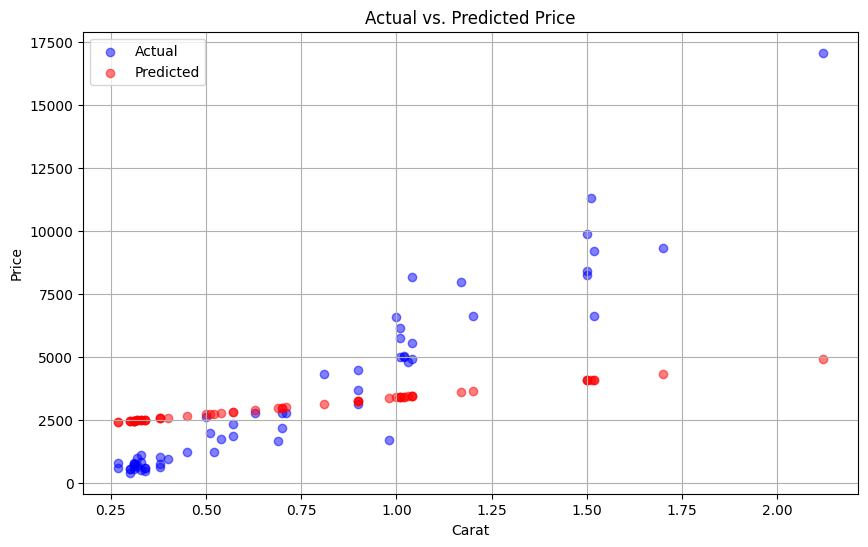

In [45]:
# Visualizing the actual vs. predicted median values of homes for the test set
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred_diamonds, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.grid(True)
plt.show()